Introduction to pytorch

In [152]:
import torch
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

1.8.1+cu111


In [118]:
# Create numpy array 
data = [[1, 2],[3, 4]]
np_data = np.array(data)

print(np_data.shape , type(np_data))

(2, 2) <class 'numpy.ndarray'>


Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data

# 3 ways to create a tensor 

Directly from tensor 

In [122]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

print(x_data , x_data.shape )

tensor([[1, 2],
        [3, 4]]) torch.Size([2, 2])


from another numpy array 

In [123]:
x_data = torch.tensor(np_data)
print(x_data , x_data.shape )

tensor([[1, 2],
        [3, 4]]) torch.Size([2, 2])


from another tensor

In [124]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6336, 0.9838],
        [0.1960, 0.6049]]) 



In [138]:
# some attributes of tensor

print(f"Shape of tensor: {x_rand.shape}")
print(f"Datatype of tensor: {x_rand.dtype}")
print(f"Device tensor is stored on: {x_rand.device}")

Shape of tensor: torch.Size([2, 2])
Datatype of tensor: torch.float32
Device tensor is stored on: cuda:0


## Tensor operations 

In [139]:
x_rand*x_rand # elementwise multiplication

tensor([[4.0143e-01, 9.6781e-01],
        [3.8412e-02, 1.0000e+04]], device='cuda:0')

In [140]:
x_rand.sin() # sine of each element of tensor

tensor([[ 0.5920,  0.8326],
        [ 0.1947, -0.5064]], device='cuda:0')

In [146]:
x_rand.add(x_rand).view(1,4)

tensor([[  1.2672,   1.9675,   0.3920, 200.0000]], device='cuda:0')

# Why use tensor at all 

1. We can use GPU for computations (x50)
2. Allows us to generate a computional graph and create gradient

In [133]:
x_rand = x_rand.to("cuda") # moving tensor to gpu 
print(f"Device tensor is stored on: {x_rand.device}")

Device tensor is stored on: cuda:0


In [137]:
print(f"gradient calculation wrt to tensor: {x_rand.requires_grad}")

x_rand[1,1] = 100 # 
x_rand

gradient calculation wrt to tensor: False


tensor([[  0.6336,   0.9838],
        [  0.1960, 100.0000]], device='cuda:0')

#### Gradients wrt to scalers 

In [202]:
x = torch.tensor(0.6, dtype=torch.float64,requires_grad = True)
z = torch.tensor(2.6, dtype=torch.float64,requires_grad = True)
y = torch.sin(x)*x + 0.004*x**5 - x**3
y = y**2 - 4*z + 34
y.backward()
x.grad , z.grad

(tensor(-0.0043, dtype=torch.float64), tensor(-4., dtype=torch.float64))

In [174]:
x_rand.requires_grad = True
print(f"gradient calculation wrt to tensor: {x_rand.requires_grad}")

y1 = x_rand.view(-1)*x_rand.view(4,1)
y1 = y1.norm()

y2 = x_rand.inverse()
y = y1*y2.norm()
print(y , y.shape)

gradient calculation wrt to tensor: True
tensor(15834.7197, device='cuda:0', grad_fn=<MulBackward0>) torch.Size([])


In [175]:
y.backward() # Computes the gradient of current tensor

In [176]:
x_rand.grad # gradients 

tensor([[-25060.2402,     57.7631],
        [   248.2798,    716.1440]], device='cuda:0')

##  We have 3 components to consider

In [154]:
# Source https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
# input 

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-np.pi, np.pi, 2000, device=device, dtype=dtype)
print(x.shape )

torch.Size([2000])


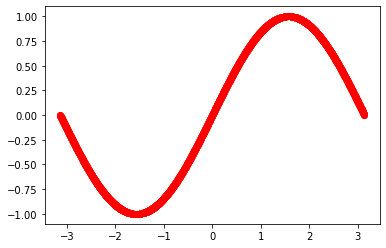

In [155]:
# output 

y = x.sin() # sin of each element

plt.plot(x,y,"ro")

objective is to define a model to represent such data. In most cases we dont know the output functions. The model should be able to give us the output given an input. 

##### How do we know if it is the right model 
To measure the quality of model, we have to define a value such that it is lowest when we get to the best model 

In [ ]:
# parameters of models 


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

In [210]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-np.pi, np.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(1):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)
    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

<generator object Module.parameters at 0x7fd99f354a50>
Result: y = -0.4730863571166992 + 0.1815604269504547 x + -0.31515631079673767 x^2 + 0.19463685154914856 x^3


Sources 

https://www.javatpoint.com/pytorch-vs-tensorflow